<a href="https://colab.research.google.com/github/CodeHunterOfficial/NLP_2024-2025/blob/main/Lecture%206.%20MLP_CNN/Lecture_6_1_1_%D0%9F%D1%80%D0%B8%D0%BC%D0%B5%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5_Convolutional_Neural_Networks_(CNN)_%D0%B2_Natural_Language_Processing_(NLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 6.1.1. Применение Convolutional Neural Networks (CNN) в Natural Language Processing (NLP)

#### Введение в CNN и NLP

Convolutional Neural Networks (CNN) первоначально были разработаны для обработки изображений, но они также находят успешное применение в задачах обработки естественного языка (NLP). Основная идея использования CNN в NLP заключается в обработке текстовых данных с помощью сверток, чтобы выявить важные характеристики текста.

#### Основные концепции CNN

1. **Свёрточный слой (Convolutional Layer)**:
   - Основной компонент CNN, который применяет фильтры (или ядра) для извлечения признаков из входных данных.
   - Формула свертки для одномерного сигнала:
     $$
     (x * w)(t) = \sum_{a=-\infty}^{\infty} x(a)w(t-a)
     $$
   - В NLP одномерная свертка часто используется для обработки последовательностей слов или символов.

2. **Пулинговый слой (Pooling Layer)**:
   - Уменьшает размерность данных и уменьшает вычислительную нагрузку, сохраняя важные признаки.
   - Наиболее распространенные виды: максимальный пулинг (max pooling) и средний пулинг (average pooling).

3. **Полносвязный слой (Fully Connected Layer)**:
   - Каждый нейрон соединен с каждым нейроном предыдущего слоя.
   - Обычно используется в конце сети для классификации или регрессии.

4. **Функции активации (Activation Functions)**:
   - Применяются после каждого свертки или полносвязного слоя для добавления нелинейности.
   - Распространенные функции: ReLU (Rectified Linear Unit), сигмоида, тангенс гиперболический (tanh).

#### Применение CNN в NLP

##### Входные данные и их представление

Тексты представляются в виде векторов. Часто используются следующие методы векторизации:
- **One-hot encoding**: каждое слово представляется в виде вектора, где один элемент равен 1, остальные - 0.
- **Embedding слои**: слова представляются плотными векторами фиксированной размерности, обученными вместе с моделью (например, Word2Vec, GloVe).

##### Архитектура CNN для NLP

1. **Входной слой**:
   - Входной текст конвертируется в матрицу векторов (например, размерностью $ N \times d $, где $ N $ - длина текста, $ d $ - размерность вектора каждого слова).

2. **Свёрточные и пулинговые слои**:
   - Несколько свёрточных фильтров различных размеров применяются для извлечения признаков из текста.
   - Максимальный пулинг обычно используется для уменьшения размерности.

3. **Полносвязные и выходные слои**:
   - Свертки объединяются и подаются на полносвязные слои.
   - Выходной слой использует softmax или сигмоиду для получения конечного предсказания.

##### Пример CNN для классификации текстов

Предположим, мы строим модель для бинарной классификации текстов (положительный или отрицательный отзыв).

1. **Входной текст**: "I love this product. It is fantastic!"
2. **Предобработка**: Токенизация и векторизация (например, с использованием эмбеддингов).
3. **CNN архитектура**:
   - Входной слой: $ \mathbf{X} \in \mathbb{R}^{N \times d} $
   - Свёрточный слой: $ \mathbf{H}_1 = f(\mathbf{W}_1 * \mathbf{X} + \mathbf{b}_1) $
   - Пулинговый слой: $ \mathbf{P}_1 = \text{max\_pool}(\mathbf{H}_1) $
   - Полносвязный слой: $ \mathbf{Z} = \sigma(\mathbf{W}_2 \mathbf{P}_1 + \mathbf{b}_2) $
   - Выходной слой: $ \hat{y} = \text{softmax}(\mathbf{W}_3 \mathbf{Z} + \mathbf{b}_3) $

##### Forward Pass

1. **Входной текст** преобразуется в матрицу эмбеддингов $ \mathbf{X} $.
2. **Свёрточный слой**: Применяем фильтр $ \mathbf{W}_1 $:
   $$
   \mathbf{H}_1 = \text{ReLU}(\mathbf{W}_1 * \mathbf{X} + \mathbf{b}_1)
   $$
3. **Пулинговый слой**: Применяем max pooling к результату:
   $$
   \mathbf{P}_1 = \text{max\_pool}(\mathbf{H}_1)
   $$
4. **Полносвязный слой**:
   $$
   \mathbf{Z} = \text{ReLU}(\mathbf{W}_2 \mathbf{P}_1 + \mathbf{b}_2)
   $$
5. **Выходной слой**:
   $$
   \hat{y} = \text{softmax}(\mathbf{W}_3 \mathbf{Z} + \mathbf{b}_3)
   $$

##### Backpropagation

Для обучения модели используется алгоритм обратного распространения ошибки.

1. **Лосс-функция**: Обычно используется кросс-энтропийная функция потерь для классификационных задач:
   $$
   \mathcal{L} = - \sum_{i=1}^N y_i \log(\hat{y}_i)
   $$
2. **Градиенты**: Рассчитываются градиенты функции потерь по параметрам модели.
3. **Обновление параметров**: Используется метод градиентного спуска или его варианты (например, Adam).

#### Метрики оценки качества модели

Для оценки качества модели обычно используются следующие метрики:
- **Accuracy (Точность)**: Доля правильных предсказаний.
- **Precision (Точность)**: Доля правильно предсказанных положительных классов.
- **Recall (Полнота)**: Доля истинных положительных классов, правильно предсказанных моделью.
- **F1-Score**: Гармоническое среднее между Precision и Recall:
  $$
  \text{F1} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
  $$

#### Пример кода на Python с использованием библиотеки Keras



## Примеры применения CNN в этих задачах
##### **1. Классификация текстов с помощью CNN**

Epoch 1/10
5/5 [==============================] - 1s 75ms/step - loss: 0.6954 - accuracy: 0.3333 - val_loss: 0.6904 - val_accuracy: 0.3333
Epoch 2/10
5/5 [==============================] - 0s 29ms/step - loss: 0.6590 - accuracy: 1.0000 - val_loss: 0.6945 - val_accuracy: 0.3333
Epoch 3/10
5/5 [==============================] - 0s 25ms/step - loss: 0.6301 - accuracy: 1.0000 - val_loss: 0.6984 - val_accuracy: 0.3333
Epoch 4/10
5/5 [==============================] - 0s 24ms/step - loss: 0.5884 - accuracy: 1.0000 - val_loss: 0.6980 - val_accuracy: 0.3333
Epoch 5/10
5/5 [==============================] - 0s 26ms/step - loss: 0.5478 - accuracy: 1.0000 - val_loss: 0.6962 - val_accuracy: 0.3333
Epoch 6/10
5/5 [==============================] - 0s 27ms/step - loss: 0.5031 - accuracy: 1.0000 - val_loss: 0.6881 - val_accuracy: 0.3333
Epoch 7/10
5/5 [==============================] - 0s 25ms/step - loss: 0.4554 - accuracy: 1.0000 - val_loss: 0.6798 - val_accuracy: 0.6667
Epoch 8/10
5/5 [===========

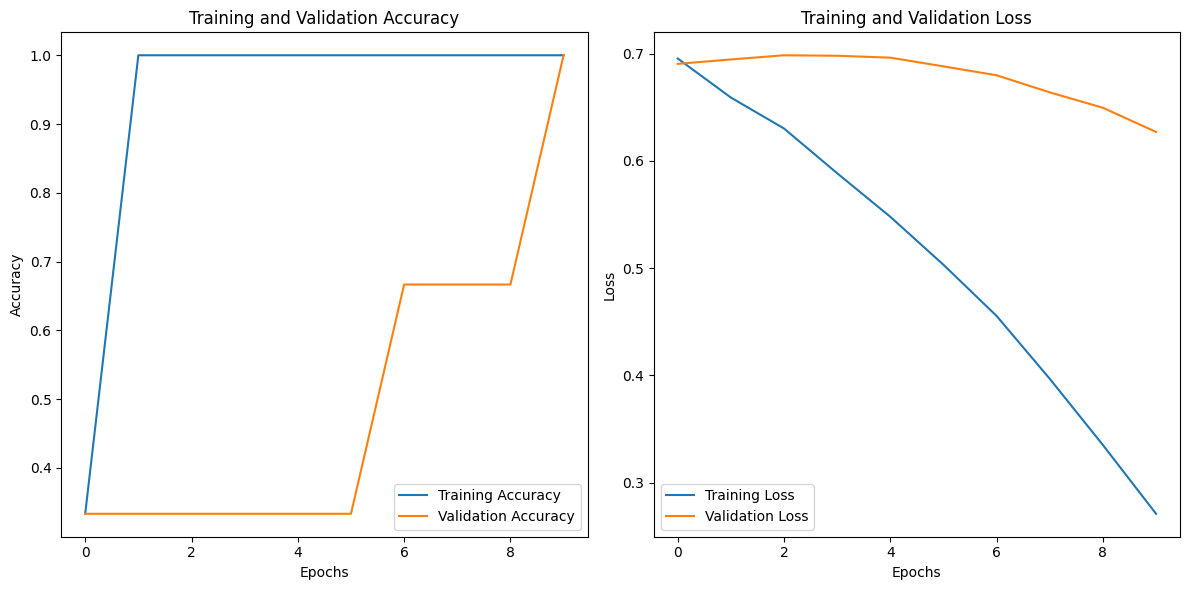

1/1 [==============================] - 0s 78ms/step
Отзыв: Отличный фильм! Очень трогательная история, рекомендую всем!
Вероятность позитивного отзыва: 0.63
Классификация: Позитивный

Отзыв: Самый ужасный фильм, который я когда-либо видел. Потраченное время и деньги.
Вероятность позитивного отзыва: 0.41
Классификация: Негативный



In [40]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
import numpy as np
import matplotlib.pyplot as plt

# Параметры
max_words = 10000  # Размер словаря
max_len = 100  # Максимальная длина последовательности
embedding_dim = 100  # Размерность эмбеддингов

# Пример данных
texts = [
    "Этот фильм ужасен, я не смог досмотреть до конца",
    "Отличный сюжет и интересные персонажи, рекомендую всем!",
    "Ничего особенного, средний фильм без изюминки",
    "Великолепный фильм, он меня вдохновил и покорил",
    "Не понравилось, персонажи были плоскими и сюжет был предсказуем",
    "Прекрасный фильм, замечательная игра актеров",
    "Этот фильм был настоящим разочарованием, ожидал большего",
    "Фильм захватывает с первых минут и держит в напряжении до конца",
    "Ужасный сценарий и отвратительная игра актеров",
    "Отличная режиссура и великолепные спецэффекты",
    "Не стоит своих денег, слишком много клише и предсказуемых моментов",
    "Смотрел с удовольствием, отличный семейный фильм"
]
labels = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

# Токенизация и векторизация
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
data = pad_sequences(sequences, maxlen=max_len)

# Создание модели
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели
history = model.fit(data, labels, epochs=10, batch_size=2, validation_split=0.2)

# График обучения
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Предсказание на новых данных
new_reviews = [
    "Отличный фильм! Очень трогательная история, рекомендую всем!",
    "Самый ужасный фильм, который я когда-либо видел. Потраченное время и деньги."
]
new_sequences = tokenizer.texts_to_sequences(new_reviews)
new_data = pad_sequences(new_sequences, maxlen=max_len)

predictions = model.predict(new_data)
predicted_labels = ['Позитивный' if pred > 0.5 else 'Негативный' for pred in predictions]

for review, prediction, label in zip(new_reviews, predictions, predicted_labels):
    print(f"Отзыв: {review}")
    print(f"Вероятность позитивного отзыва: {prediction[0]:.2f}")
    print(f"Классификация: {label}\n")

#### **2. Анализ тональности с помощью CNN**

Epoch 1/10
5/5 [==============================] - 1s 91ms/step - loss: 0.7103 - accuracy: 0.3333 - val_loss: 0.6906 - val_accuracy: 0.6667
Epoch 2/10
5/5 [==============================] - 0s 43ms/step - loss: 0.6510 - accuracy: 0.7778 - val_loss: 0.6899 - val_accuracy: 1.0000
Epoch 3/10
5/5 [==============================] - 0s 46ms/step - loss: 0.6005 - accuracy: 1.0000 - val_loss: 0.6822 - val_accuracy: 1.0000
Epoch 4/10
5/5 [==============================] - 0s 46ms/step - loss: 0.5500 - accuracy: 1.0000 - val_loss: 0.6621 - val_accuracy: 0.6667
Epoch 5/10
5/5 [==============================] - 0s 39ms/step - loss: 0.4925 - accuracy: 1.0000 - val_loss: 0.6504 - val_accuracy: 0.6667
Epoch 6/10
5/5 [==============================] - 0s 41ms/step - loss: 0.4347 - accuracy: 1.0000 - val_loss: 0.6428 - val_accuracy: 1.0000
Epoch 7/10
5/5 [==============================] - 0s 45ms/step - loss: 0.3702 - accuracy: 1.0000 - val_loss: 0.6378 - val_accuracy: 1.0000
Epoch 8/10
5/5 [===========

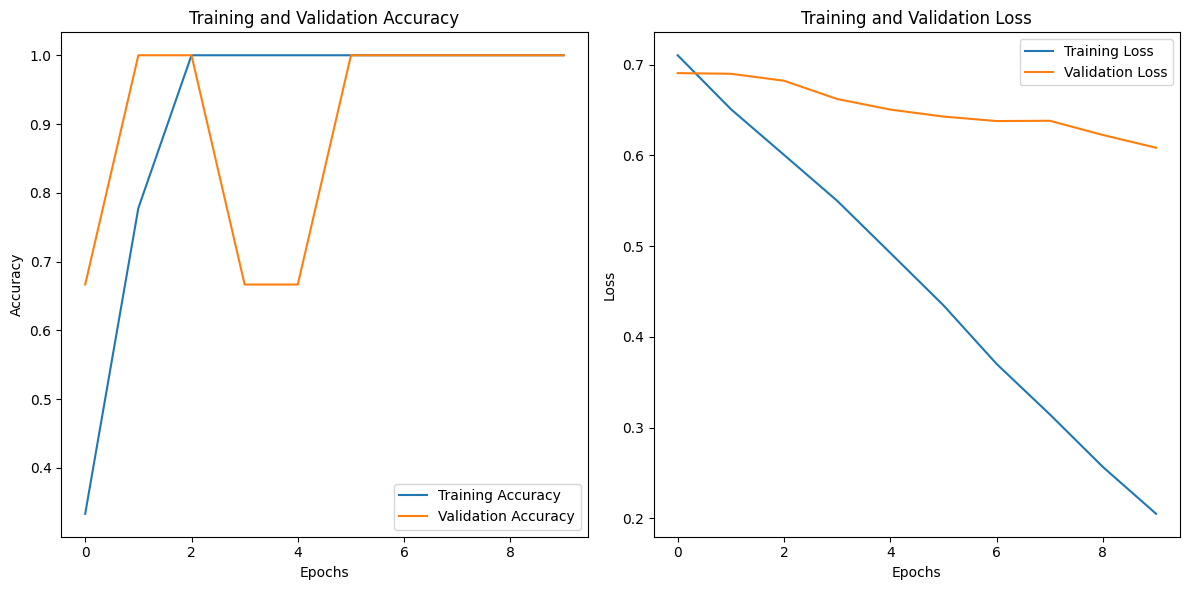

1/1 [==============================] - 0s 107ms/step
Отзыв: Отличный фильм! Очень трогательная история, рекомендую всем!
Вероятность позитивного отзыва: 0.65
Классификация: Позитивный

Отзыв: Самый ужасный фильм, который я когда-либо видел. Потраченное время и деньги.
Вероятность позитивного отзыва: 0.48
Классификация: Негативный



In [41]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
import numpy as np
import matplotlib.pyplot as plt

# Параметры
max_words = 20000  # Размер словаря
max_len = 200  # Максимальная длина последовательности
embedding_dim = 100  # Размерность эмбеддингов

# Пример данных
texts = [
    "Этот фильм ужасен, я не смог досмотреть до конца",
    "Отличный сюжет и интересные персонажи, рекомендую всем!",
    "Ничего особенного, средний фильм без изюминки",
    "Великолепный фильм, он меня вдохновил и покорил",
    "Не понравилось, персонажи были плоскими и сюжет был предсказуем",
    "Прекрасный фильм, замечательная игра актеров",
    "Этот фильм был настоящим разочарованием, ожидал большего",
    "Фильм захватывает с первых минут и держит в напряжении до конца",
    "Ужасный сценарий и отвратительная игра актеров",
    "Отличная режиссура и великолепные спецэффекты",
    "Не стоит своих денег, слишком много клише и предсказуемых моментов",
    "Смотрел с удовольствием, отличный семейный фильм"
]
labels = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

# Токенизация и векторизация
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
data = pad_sequences(sequences, maxlen=max_len)

# Создание модели
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели
history = model.fit(data, labels, epochs=10, batch_size=2, validation_split=0.2)

# График обучения
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Предсказание на новых данных
new_reviews = [
    "Отличный фильм! Очень трогательная история, рекомендую всем!",
    "Самый ужасный фильм, который я когда-либо видел. Потраченное время и деньги."
]
new_sequences = tokenizer.texts_to_sequences(new_reviews)
new_data = pad_sequences(new_sequences, maxlen=max_len)

predictions = model.predict(new_data)
predicted_labels = ['Позитивный' if pred > 0.5 else 'Негативный' for pred in predictions]

for review, prediction, label in zip(new_reviews, predictions, predicted_labels):
    print(f"Отзыв: {review}")
    print(f"Вероятность позитивного отзыва: {prediction[0]:.2f}")
    print(f"Классификация: {label}\n")

#### **3. Разрешение синонимии и антонимии (Synonym and Antonym Resolution)**

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Epoch 1/10
16/16 [==============================] - 2s 26ms/step - loss: 0.6964 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 2/10
16/16 [==============================] - 0s 8ms/step - loss: 0.6944 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
16/16 [==============================] - 0s 8ms/step - loss: 0.6936 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/10
16/16 [==============================] - 0s 9ms/step - loss: 0.6938 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
16/16 [==============================] - 0s 7ms/step - loss: 0.6936 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/10
16/16 [==============================] - 0s 5ms/step - loss: 0.6942 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
16/16 [==============================] - 0s 5ms/step - loss: 0.6938 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/10
16/16 [=

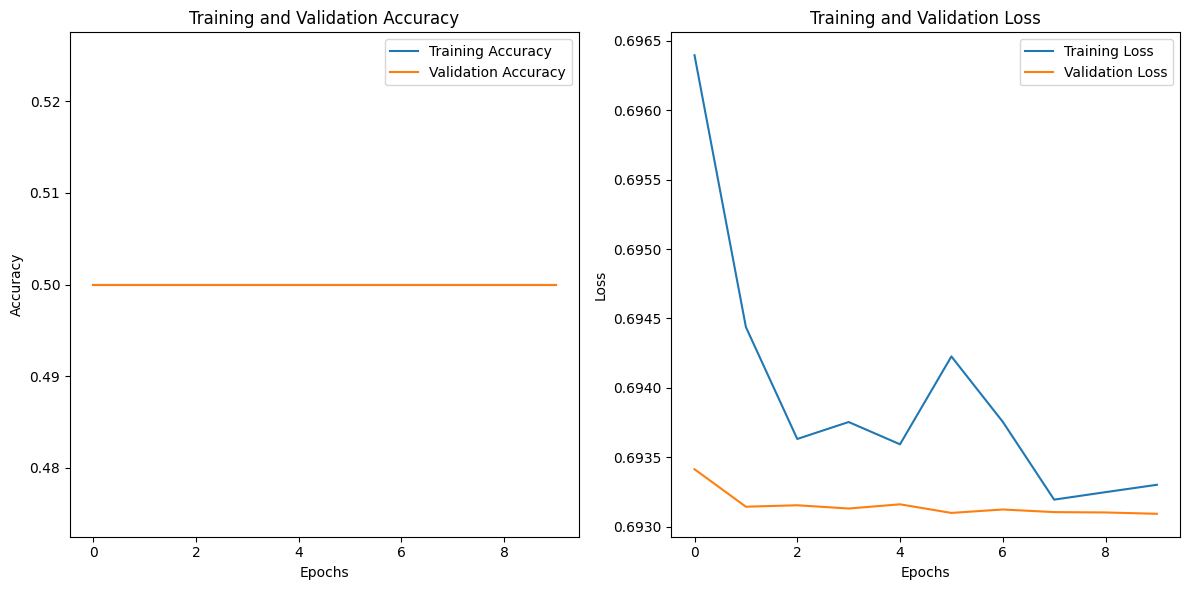

1/1 [==============================] - 0s 80ms/step
              precision    recall  f1-score   support

     Antonym       0.50      1.00      0.67         4
     Synonym       0.00      0.00      0.00         4

    accuracy                           0.50         8
   macro avg       0.25      0.50      0.33         8
weighted avg       0.25      0.50      0.33         8

1/1 [==============================] - 0s 21ms/step
Слова: веселый и радостный, Предсказанная метка: Антонимы


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
import numpy as np
import nltk
from sklearn.metrics import classification_report
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.optimizers import Adam

nltk.download('punkt')

# Example word pairs
synonym_pairs = [
    ("большой", "огромный"),
    ("маленький", "крошечный"),
    ("умный", "сообразительный"),
    ("красивый", "прекрасный"),
    ("добрый", "любезный"),
    ("храбрый", "смелый"),
    ("сильный", "могучий"),
    ("глубокий", "профундный"),
    ("ясный", "понятный"),
    ("спокойный", "тихий"),
    ("честный", "правдивый"),
    ("мудрый", "знающий"),
    ("дружелюбный", "общительный"),
    ("быстрый", "скорый"),
    ("веселый", "радостный"),
    ("умелый", "мастеровитый"),
    ("горячий", "пылкий"),
    ("крепкий", "твердый"),
    ("живой", "полный жизни"),
    ("яркий", "ясный")
]

antonym_pairs = [
    ("большой", "маленький"),
    ("быстрый", "медленный"),
    ("темный", "светлый"),
    ("день", "ночь"),
    ("горячий", "холодный"),
    ("новый", "старый"),
    ("грубый", "нежный"),
    ("гладкий", "шероховатый"),
    ("глупый", "умный"),
    ("трудный", "легкий"),
    ("напряженный", "расслабленный"),
    ("тупой", "острый"),
    ("жадный", "щедрый"),
    ("сухой", "мокрый"),
    ("густой", "редкий"),
    ("глухой", "звонкий"),
    ("недавний", "прошлый"),
    ("несчастливый", "счастливый"),
    ("темный", "светлый"),
    ("худой", "толстый")
]

word_pairs = synonym_pairs + antonym_pairs
labels = [1] * len(synonym_pairs) + [0] * len(antonym_pairs)  # 1 for synonym, 0 for antonym

# Training a simple Word2Vec model
sentences = [word_tokenize(pair[0]) + word_tokenize(pair[1]) for pair in word_pairs]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

def get_word2vec(word, model, vector_size=100):
    return model[word] if word in model else np.zeros(vector_size)

# Prepare feature vectors
X = []
for word1, word2 in word_pairs:
    vec1 = get_word2vec(word1, word2vec_model.wv)
    vec2 = get_word2vec(word2, word2vec_model.wv)
    X.append(np.concatenate((vec1, vec2)))

X = np.array(X)
y = np.array(labels)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Reshape data for CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the CNN model
model = Sequential([
    Conv1D(128, 5, activation='relu', input_shape=(X_train.shape[1], 1)),
    GlobalMaxPooling1D(),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history=model.fit(X_train, y_train, epochs=10, batch_size=2, validation_data=(X_test, y_test), verbose=1)

# График обучения
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()



# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred, target_names=["Antonym", "Synonym"]))


# Example prediction for a new pair of words
new_pair = ("веселый", "радостный")
vec1 = get_word2vec(new_pair[0], word2vec_model.wv)
vec2 = get_word2vec(new_pair[1], word2vec_model.wv)
X_new = np.concatenate((vec1, vec2)).reshape(1, -1, 1)

prediction = model.predict(X_new)

print(f"Слова: {new_pair[0]} и {new_pair[1]}, Предсказанная метка: {'Синонимы' if prediction[0][0] > 0.5 else 'Антонимы'}")